# Bank Marketing 


The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y)


1 - age (numeric)

2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')

3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)

4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')

5 - default: has credit in default? (categorical: 'no','yes','unknown')

6 - housing: has housing loan? (categorical: 'no','yes','unknown')

7 - loan: has personal loan? (categorical: 'no','yes','unknown')

##### related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')

9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')

10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')

11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.

##### other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)

14 - previous: number of contacts performed before this campaign and for this client (numeric)

15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')

##### social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)

17 - cons.price.idx: consumer price index - monthly indicator (numeric)

18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)

19 - euribor3m: euribor 3 month rate - daily indicator (numeric)

20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')

importing necessary libraries

In [1]:
import seaborn as sns #importing necessary packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd  
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score,GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix,precision_score, recall_score, accuracy_score,classification_report,roc_curve,f1_score    
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.utils import resample
from sklearn.model_selection import RandomizedSearchCV
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline, FeatureUnion\
#from pandas import MultiIndex, Int64Index
#from xgboost import XGBClassifier

In [2]:
#finding the unique values makes easy to transfer that into the unique values
def print_unique_col_values(data):         #finding unique values
    for column in data:                    #looping through the data 
        if data[column].dtypes=='object':   #only for the object column
            print(f'{column}: {data[column].unique()}') 

In [3]:
def label_encoding():
    
    #replacing the object datatype into the interger values
    #inplace is true means that the changes made in the dataset is fixed
    data['y'].replace(['yes', 'no'], [1, 0], inplace=True) 
    print(data['y'])
    
    data['job'].replace(['unknown','housemaid', 'services', 'admin.', 'blue-collar', 'technician', 'retired', 'management', 'unemployed', 'self-employed','entrepreneur', 'student'], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], inplace=True)  
    print(data['job'])
    
    data['marital'].replace(['married', 'single', 'divorced', 'unknown'], [11, 12, 13, 14], inplace=True)  
    print(data['marital'])
    
    data['education'].replace(['unknown', 'basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'university.degree','illiterate'], [0, 1, 2, 3, 4, 5, 6, 7], inplace=True)  
    print(data['education'])
    
    data['default'].replace(['no', 'unknown', 'yes'], [0, 2, 1], inplace=True)  
    print(data['default'])
    
    data['housing'].replace(['no', 'yes', 'unknown'], [0, 1, 2], inplace=True)  
    print(data['housing'])
    
    data['loan'].replace(['no', 'yes', 'unknown'], [0, 1, 2], inplace=True)  
    print(data['loan'])
    
    data['contact'].replace(['telephone', 'cellular'], [99,11], inplace=True)  
    print(data['contact'])
    
    data['month'].replace(['may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'mar', 'apr',
       'sep'], [5, 6, 7, 8, 10, 11, 12, 3, 4, 9], inplace=True)  
    print(data['month'])
    
    data['day_of_week'].replace(['mon', 'tue', 'wed', 'thu', 'fri'], [1, 2, 3, 4, 5], inplace=True)  
    print(data['day_of_week'])
     
    data['poutcome'].replace(['nonexistent', 'failure', 'success'], [1, 0, 2], inplace=True)  
    print(data['poutcome'])


In [4]:
def adaboost_classifier(x, y, xt, yt):   
    boost = AdaBoostClassifier()
    boost.fit(x, y)                        #fitting the boost for train
    print(boost)
    y_pred = boost.predict(xt)                     #making predictions for test
    predictions = [round(value) for value in y_pred]   #rounding the values 
    #accuracy
    accuracy = accuracy_score(yt, predictions)     #accuracy result
    print("Accuracy: %.2f%%" %(accuracy*100.0))        #%2f for after point print only 2 values

In [5]:
from xgboost import XGBClassifier
def xgb_classifier(x, y, xt, yt):
    boost2 = XGBClassifier()
    boost2.fit(x, y)                       #fitting the boost2 for train
    print(boost2)
    y_pred = boost2.predict(xt)                    #making predictions for test
    predictions = [round(value) for value in y_pred]   #rounding the values
    #accuracy
    accuracy = accuracy_score(yt, predictions)     #accuracy result
    print("Accuracy: %.2f%%" %(accuracy*100.0))        #%2f for after point print only 2 values

/home/suvetha/anaconda3/lib/python3.8/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [6]:
def gradientboost_classifier(x, y, xt, yt):
    boost1 = GradientBoostingClassifier()   
    boost1.fit(x, y)                       #fitting the boost1 for train
    print(boost1)
    y_pred = boost1.predict(xt)                    #making predictions for test
    predictions = [round(value) for value in y_pred]   #rounding the values
    #accuracy
    accuracy = accuracy_score(yt, predictions)     #accuracy result
    print("Accuracy: %.2f%%" %(accuracy*100.0))        #%2f for after point print only 2 values

In [7]:
def logistic_regression(x, y, xt, yt):     
    model = LogisticRegression()                        #reason - the plotted graph represents curve
    model.fit(x, y)                         #fit for train
    y_pred = model.predict(xt)                      #Generate predictions with the model using our X values
    print("Confusion Matrix: ", confusion_matrix(yt, y_pred))  #confusion matrix
    print ("Accuracy : ", accuracy_score(yt,y_pred)*100)       #accuracy
    print("Report : ", classification_report(yt, y_pred))      #classification report
    
    #precision - portion of positive identifications in a classification set that were actually correct
    #recall - proportion of actual positives that were identified correctly


In [8]:
def knn(x, y, xt, yt):
    model1 =  KNeighborsClassifier()
    model1.fit(x, y)                         #fit for train
    y_pred = model1.predict(xt)                      #Generate predictions with the model using our X values
    print("Confusion Matrix: ", confusion_matrix(yt, y_pred))  #confusion matrix
    print ("Accuracy : ", accuracy_score(yt,y_pred)*100)       #accuracy
    print("Report : ", classification_report(yt, y_pred))  

In [9]:
def decision_tree(x, y, xt, yt):
    model2 = DecisionTreeClassifier()
    model2.fit(x, y)                         #fit for train
    y_pred = model2.predict(xt)                      #Generate predictions with the model using our X values
    print("Confusion Matrix: ", confusion_matrix(yt, y_pred))  #confusion matrix
    print ("Accuracy : ", accuracy_score(yt,y_pred)*100)       #accuracy
    print("Report : ", classification_report(yt, y_pred)) 


In [10]:
def random_forest(x, y, xt, yt):
    model3 = RandomForestClassifier()
    model3.fit(x, y)                         #fit for train
    y_pred = model3.predict(xt)                      #Generate predictions with the model using our X values
    print("Confusion Matrix: ", confusion_matrix(yt, y_pred))  #confusion matrix
    print ("Accuracy : ", accuracy_score(yt,y_pred)*100)       #accuracy
    print("Report : ", classification_report(yt, y_pred))
    #yp = model3.predict(x_test)
    #print(yp[76:79])

In [11]:
def svm(x, y, xt, yt):
    model4 = SVC()
    model4.fit(x, y)                         #fit for train
    y_pred = model4.predict(xt)                      #Generate predictions with the model using our X values
    print("Confusion Matrix: ", confusion_matrix(yt, y_pred))  #confusion matrix
    print ("Accuracy : ", accuracy_score(yt,y_pred)*100)       #accuracy
    print("Report : ", classification_report(yt, y_pred))  

In [12]:
def dropped_param():
    print('Logistic Regression')
    logistic_regression(x_train_drop, y_train_drop, x_test_drop, y_test_drop)
    print('------------------------------')
    print('knn')
    knn(x_train_drop, y_train_drop, x_test_drop, y_test_drop)   
    print('------------------------------')
    print('Decision tree')
    decision_tree(x_train_drop, y_train_drop, x_test_drop, y_test_drop)  
    print('------------------------------')
    print('Random forest')
    random_forest(x_train_drop, y_train_drop, x_test_drop, y_test_drop) 
    print('------------------------------')
    print('SVM')
    svm(x_train_drop, y_train_drop, x_test_drop, y_test_drop)
    
    adaboost_classifier(x_train_drop, y_train_drop, x_test_drop, y_test_drop)
    gradientboost_classifier(x_train_drop, y_train_drop, x_test_drop, y_test_drop)

implementing the dataset

In [13]:
data = pd.read_csv('bank-additional-full.csv', sep=';')   #Reading the csv file using pandas
                                                          #the data in the dataset are seperated by ; so for easy analysis i used the ;
print(data.head())                                        #printing only the first 5 rows

   age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed

In [14]:
data.shape   #41188 rows and 21 columns

(41188, 21)

In [15]:
data.info() #informations about the dataset such as column, non null counts, datatype of the particular feature

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [16]:
data.columns #checking the columns in the dataset

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [17]:
data.dtypes   #there are lot of object datatype in the dataset so we have to convert that into int

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [18]:
data.isnull().sum()   #checking if any of the data in the dataset contains null value

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

Finding the unique values for the object datatypes

In [19]:
data.describe()  #it returns the description of data in the dataset suxh as count, mean,...

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [20]:
data.value_counts('y')

y  
no     36548
yes     4640
dtype: int64

In [21]:
data.head(21) #chekcking the 22 colums for conformation of changes

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [22]:
data.dtypes  #now everthing is changed into numeric we can proceed with the visualization part

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [23]:
print_unique_col_values(data)

job: ['housemaid' 'services' 'admin.' 'blue-collar' 'technician' 'retired'
 'management' 'unemployed' 'self-employed' 'unknown' 'entrepreneur'
 'student']
marital: ['married' 'single' 'divorced' 'unknown']
education: ['basic.4y' 'high.school' 'basic.6y' 'basic.9y' 'professional.course'
 'unknown' 'university.degree' 'illiterate']
default: ['no' 'unknown' 'yes']
housing: ['no' 'yes' 'unknown']
loan: ['no' 'yes' 'unknown']
contact: ['telephone' 'cellular']
month: ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']
day_of_week: ['mon' 'tue' 'wed' 'thu' 'fri']
poutcome: ['nonexistent' 'failure' 'success']
y: ['no' 'yes']


In [24]:
label_encoding()

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64
0        1
1        2
2        2
3        3
4        2
        ..
41183    6
41184    4
41185    6
41186    5
41187    6
Name: job, Length: 41188, dtype: int64
0        11
1        11
2        11
3        11
4        11
         ..
41183    11
41184    11
41185    11
41186    11
41187    11
Name: marital, Length: 41188, dtype: int64
0        1
1        2
2        2
3        3
4        2
        ..
41183    5
41184    5
41185    6
41186    5
41187    5
Name: education, Length: 41188, dtype: int64
0        0
1        2
2        0
3        0
4        0
        ..
41183    0
41184    0
41185    0
41186    0
41187    0
Name: default, Length: 41188, dtype: int64
0        0
1        0
2        1
3        0
4        0
        ..
41183    1
41184    0
41185    1
41186    0
41187    1
Name: housing, Length: 41188, dtype: int64
0        0
1 

Relationship between features

In [25]:
corr = data.corr()  #the relationship between the features can be viewd by this
corr

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,0.024042,-0.114983,-0.129404,0.165019,-0.001923,-0.006397,0.007021,0.077265,-0.018486,...,0.004594,-0.034369,0.024365,0.019750,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
job,0.024042,1.000000,-0.005790,0.150877,-0.033276,0.006794,-0.005560,-0.026371,0.062013,0.004164,...,-0.017591,-0.046394,0.050780,0.000524,-0.087012,-0.054880,0.013656,-0.076483,-0.085450,0.054175
marital,-0.114983,-0.005790,1.000000,0.054594,-0.103804,0.007436,0.001719,-0.043564,-0.003521,-0.004210,...,0.002269,-0.017635,0.030222,-0.013144,-0.048931,-0.024995,-0.051013,-0.054623,-0.050058,0.026302
education,-0.129404,0.150877,0.054594,1.000000,-0.162584,0.017151,0.004575,-0.095334,0.108020,0.002747,...,-0.002793,-0.016707,0.005684,0.013558,-0.024899,-0.086017,0.045685,-0.015525,-0.007188,0.026145
default,0.165019,-0.033276,-0.103804,-0.162584,1.000000,-0.010940,0.001088,0.135535,-0.084695,-0.004103,...,0.032967,0.080064,-0.102574,0.023629,0.203263,0.168288,0.026399,0.195305,0.189789,-0.099324
housing,-0.001923,0.006794,0.007436,0.017151,-0.010940,1.000000,0.289759,-0.065393,0.023968,-0.007088,...,-0.010190,-0.008741,0.021002,-0.013285,-0.053458,-0.066337,-0.027737,-0.052739,-0.042281,0.009552
loan,-0.006397,-0.005560,0.001719,0.004575,0.001088,0.289759,1.000000,0.004391,-0.009307,0.003206,...,0.003899,0.001298,0.000846,-0.004236,0.003055,0.006315,-0.005895,0.001547,0.002464,-0.005038
contact,0.007021,-0.026371,-0.043564,-0.095334,0.135535,-0.065393,0.004391,1.000000,-0.324315,0.019583,...,0.077368,0.117970,-0.212848,0.118744,0.393584,0.591474,0.251614,0.399773,0.269155,-0.144773
month,0.077265,0.062013,-0.003521,0.108020,-0.084695,0.023968,-0.009307,-0.324315,1.000000,-0.006959,...,-0.030635,-0.079556,0.063754,0.028950,0.058874,-0.150350,0.264227,0.163411,0.132697,0.037187
day_of_week,-0.018486,0.004164,-0.004210,0.002747,-0.004103,-0.007088,0.003206,0.019583,-0.006959,1.000000,...,0.015098,0.006765,0.004013,-0.012788,-0.004401,-0.004586,-0.000099,-0.005552,-0.000734,0.010051


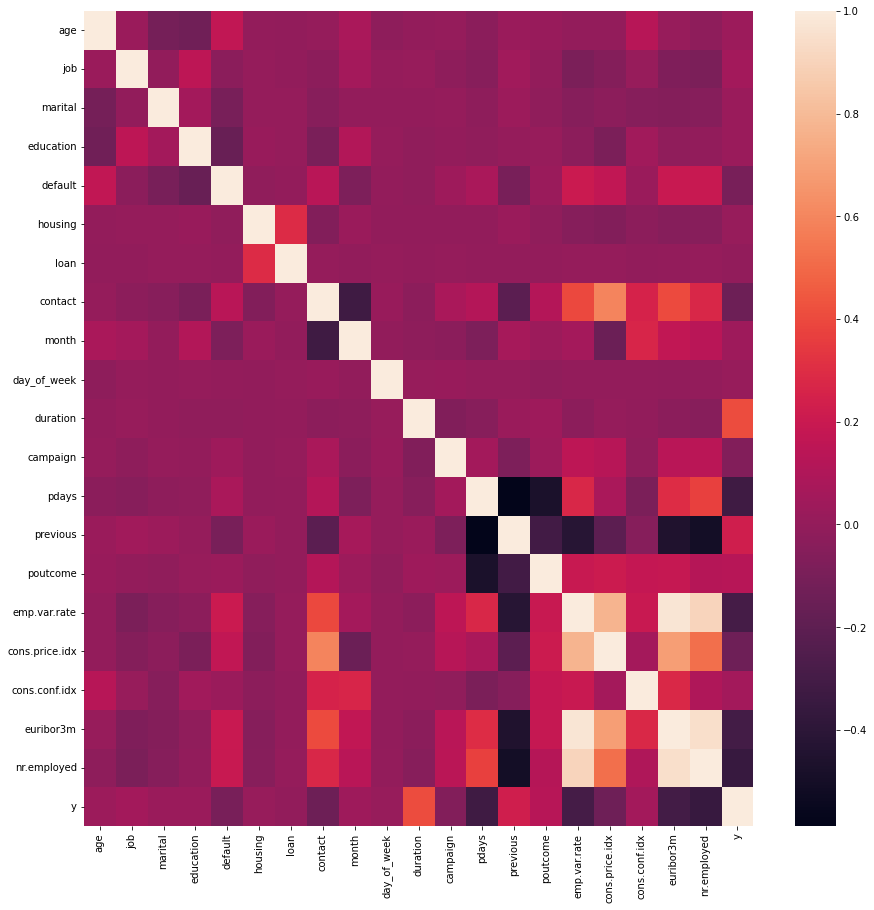

In [26]:
fig = plt.figure(figsize=[15, 15]) #the figure size (height and width)
sns.heatmap(corr, annot=False) #annot represents write the datavalue in each cell

plt.show()  #the top bar represents the positive correlation and the lower are negative

#euribor3m and emp.var.rate are highly positive correlated.
#nr.employed and euribor3m are highly positive correlated.
#nr.employed and emp.var.rate are highly positive correlated.
#other than these everything has negative and neutral correlation


checking the relationship between the positive correlated features

<AxesSubplot:xlabel='nr.employed', ylabel='euribor3m'>

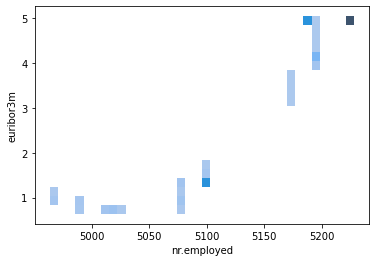

In [27]:
sns.histplot(data=data, x = "nr.employed", y="euribor3m") #the graph is curve so logistic regression

<AxesSubplot:xlabel='nr.employed', ylabel='emp.var.rate'>

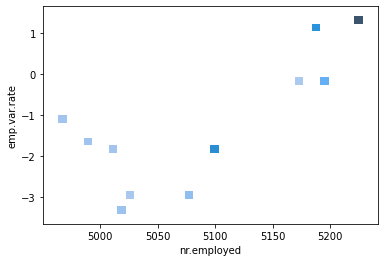

In [28]:
sns.histplot(data=data, x = "nr.employed", y="emp.var.rate")

<AxesSubplot:xlabel='euribor3m', ylabel='emp.var.rate'>

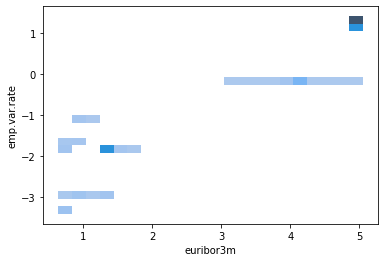

In [29]:
sns.histplot(data=data, x = "euribor3m", y="emp.var.rate")

<AxesSubplot:xlabel='duration', ylabel='y'>

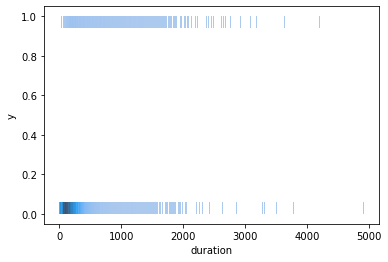

In [30]:
sns.histplot(data=data, x = "duration", y="y") 

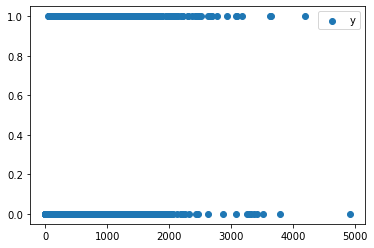

In [31]:
plt.scatter(data=data,x = "duration", y="y")
plt.legend()
plt.show()

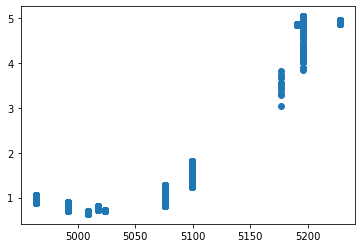

In [32]:
plt.scatter(data=data,x = "nr.employed", y="euribor3m")
plt.show()

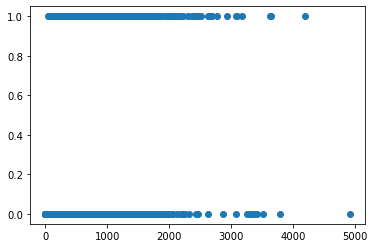

In [33]:
plt.scatter(data=data, x='duration', y='y') #i used duration because it highly affect the accuracy
plt.show()

In [34]:
x=data.iloc[:,:-1].values   #all the columns except the last column for x
y=data.iloc[:,-1].values    #only the last column for the y

In [35]:
from sklearn.model_selection import train_test_split    #25 for train and remaining for test
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size=0.25, random_state=0) #random state - ensures that the splits that we generate are reproducible

In [36]:
x_train.shape               #checking the shape for all the splitted data

(30891, 20)

In [37]:
x_test.shape

(10297, 20)

In [38]:
y_train.shape

(30891,)

In [39]:
y_test.shape

(10297,)

In [40]:
from sklearn.preprocessing import StandardScaler #used for scaling the data
sc = StandardScaler()
x_train = sc.fit_transform(x_train)  #fit for train the data
                                     #transform for converting all the datatypes as single datatypes
x_test = sc.transform(x_test)

In [41]:
logistic_regression(x_train, y_train, x_test, y_test)

Confusion Matrix:  [[8918  221]
 [ 675  483]]
Accuracy :  91.29843643779742
Report :                precision    recall  f1-score   support

           0       0.93      0.98      0.95      9139
           1       0.69      0.42      0.52      1158

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297



In [42]:
knn(x_train, y_train, x_test, y_test)    

Confusion Matrix:  [[8799  340]
 [ 646  512]]
Accuracy :  90.4243954549869
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.95      9139
           1       0.60      0.44      0.51      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.70      0.73     10297
weighted avg       0.89      0.90      0.90     10297



In [43]:
decision_tree(x_train, y_train, x_test, y_test)  

Confusion Matrix:  [[8576  563]
 [ 549  609]]
Accuracy :  89.20073807905216
Report :                precision    recall  f1-score   support

           0       0.94      0.94      0.94      9139
           1       0.52      0.53      0.52      1158

    accuracy                           0.89     10297
   macro avg       0.73      0.73      0.73     10297
weighted avg       0.89      0.89      0.89     10297



In [44]:
random_forest(x_train, y_train, x_test, y_test) 

Confusion Matrix:  [[8845  294]
 [ 566  592]]
Accuracy :  91.64805283092163
Report :                precision    recall  f1-score   support

           0       0.94      0.97      0.95      9139
           1       0.67      0.51      0.58      1158

    accuracy                           0.92     10297
   macro avg       0.80      0.74      0.77     10297
weighted avg       0.91      0.92      0.91     10297



In [45]:
from sklearn.svm import SVC
svm(x_train, y_train, x_test, y_test)

Confusion Matrix:  [[8940  199]
 [ 717  441]]
Accuracy :  91.10420510828396
Report :                precision    recall  f1-score   support

           0       0.93      0.98      0.95      9139
           1       0.69      0.38      0.49      1158

    accuracy                           0.91     10297
   macro avg       0.81      0.68      0.72     10297
weighted avg       0.90      0.91      0.90     10297



In [46]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,1,11,1,0,0,0,99,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
1,57,2,11,2,2,0,0,99,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,2,11,2,0,1,0,99,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,3,11,3,0,0,0,99,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,2,11,2,0,0,1,99,5,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


In [47]:
data.shape

(41188, 21)

dropping features 

In [48]:
data.drop(columns = ['pdays','emp.var.rate', 'nr.employed'],inplace = True, axis=1)    
data_mod = data.copy()
data_mod.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,y
0,56,1,11,1,0,0,0,99,5,1,261,1,0,1,93.994,-36.4,4.857,0
1,57,2,11,2,2,0,0,99,5,1,149,1,0,1,93.994,-36.4,4.857,0
2,37,2,11,2,0,1,0,99,5,1,226,1,0,1,93.994,-36.4,4.857,0
3,40,3,11,3,0,0,0,99,5,1,151,1,0,1,93.994,-36.4,4.857,0
4,56,2,11,2,0,0,1,99,5,1,307,1,0,1,93.994,-36.4,4.857,0


In [49]:
data_mod.shape

(41188, 18)

In [50]:
m=data_mod.iloc[:,:-1].values  
n=data_mod.iloc[:,-1].values 

In [51]:
x_train_drop, x_test_drop, y_train_drop, y_test_drop= train_test_split (m, n, test_size=0.25, random_state=0)

In [52]:
print(x_train_drop.shape)
print(x_test_drop.shape)
print(y_train_drop.shape)
print(y_test_drop.shape)

(30891, 17)
(10297, 17)
(30891,)
(10297,)


In [53]:
from sklearn.preprocessing import StandardScaler 
sm = StandardScaler()
x_train_drop = sm.fit_transform(x_train_drop)  
x_test_drop = sm.transform(x_test_drop)  

In [54]:
dropped_param()

Logistic Regression
Confusion Matrix:  [[8930  209]
 [ 677  481]]
Accuracy :  91.39555210255415
Report :                precision    recall  f1-score   support

           0       0.93      0.98      0.95      9139
           1       0.70      0.42      0.52      1158

    accuracy                           0.91     10297
   macro avg       0.81      0.70      0.74     10297
weighted avg       0.90      0.91      0.90     10297

------------------------------
knn
Confusion Matrix:  [[8809  330]
 [ 659  499]]
Accuracy :  90.39526075555987
Report :                precision    recall  f1-score   support

           0       0.93      0.96      0.95      9139
           1       0.60      0.43      0.50      1158

    accuracy                           0.90     10297
   macro avg       0.77      0.70      0.72     10297
weighted avg       0.89      0.90      0.90     10297

------------------------------
Decision tree
Confusion Matrix:  [[8541  598]
 [ 546  612]]
Accuracy :  88.8899679518306

In [55]:
adaboost_classifier(x_train, y_train, x_test, y_test)
gradientboost_classifier(x_train, y_train, x_test, y_test)

AdaBoostClassifier()
Accuracy: 91.41%
GradientBoostingClassifier()
Accuracy: 92.25%


hyper parameter tuning - grid and random search

Grid search

In [56]:
#using grid search for tuning parameters
param_grid = [
        {'n_estimators': [200], #no of trees  #increasing the no of trees affects the accuracy
         'max_features': [3], #got this by sqrt the features for better prediction  
         'max_depth' : [100],   #increaing this will increase the accuracy
                               #after 55 if i increase there is nothing change in the accuracy
         'min_samples_split' : [4],  #minimum number of samples required to split an internal node
         'min_samples_leaf' : [1], #The minimum number of samples required to be at a leaf node
         'criterion' : ['gini'],  #entropy performs bad so i go with gini
         "oob_score": [True],
         "bootstrap": [True]}
]
bank_RF = RandomForestClassifier(n_jobs=-1, warm_start = True, random_state=0) 
                                #n_jobs - The number of jobs to run in parallel, -1 all processors
                                #warm_start - reuse the solution of the previous call to fit and add more estimators to the ensemble
#using 5 fold, because it's faster to train cv=5.
grid_search = GridSearchCV(bank_RF, param_grid, cv = 5)
grid_search.fit(x_train_drop, y_train_drop)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(n_jobs=-1, random_state=0,
                                              warm_start=True),
             param_grid=[{'bootstrap': [True], 'criterion': ['gini'],
                          'max_depth': [100], 'max_features': [3],
                          'min_samples_leaf': [1], 'min_samples_split': [4],
                          'n_estimators': [200], 'oob_score': [True]}])

In [57]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=100, max_features=3, min_samples_split=4,
                       n_estimators=200, n_jobs=-1, oob_score=True,
                       random_state=0, warm_start=True)

In [58]:
#train Random Forest using those parameters
model = grid_search.best_estimator_
x_test_drop = sc.fit_transform(x_test_drop)
final_predictions = model.predict(x_test_drop)
final_accuracy = accuracy_score(y_test_drop,final_predictions)
Recall = recall_score(y_test_drop,final_predictions)
Precision = precision_score(y_test_drop,final_predictions)
F1_Score = f1_score(y_test_drop,final_predictions)
acu_score = roc_auc_score(y_test_drop,final_predictions)
print("Final_Accuracy: {:.4f}".format(final_accuracy*100))
print("Recall: " + str(Recall))
print("Pecision: " + str(Precision))
print("f1 score: " + str(F1_Score))
print("acu_area: " + str(acu_score))

#boosting
gradientboost_classifier(x_train_drop, y_train_drop, x_test_drop, y_test_drop)

Final_Accuracy: 91.7452
Recall: 0.5215889464594128
Pecision: 0.6711111111111111
f1 score: 0.586977648202138
acu_area: 0.7446001412459007
GradientBoostingClassifier()
Accuracy: 91.83%


Random search

In [59]:
#model
MOD = RandomForestClassifier(n_jobs=-1, warm_start = True, random_state=0)
random_search = RandomizedSearchCV(MOD,param_grid, n_iter = 20,return_train_score = True,random_state = 42,cv = 5,verbose = 1) 
#trains and optimizes the model
random_search.fit(x_train_drop, y_train_drop)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/suvetha/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:292: UserWarning: The total space of parameters 1 is smaller than n_iter=20. Running 1 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


RandomizedSearchCV(cv=5,
                   estimator=RandomForestClassifier(n_jobs=-1, random_state=0,
                                                    warm_start=True),
                   n_iter=20,
                   param_distributions=[{'bootstrap': [True],
                                         'criterion': ['gini'],
                                         'max_depth': [100],
                                         'max_features': [3],
                                         'min_samples_leaf': [1],
                                         'min_samples_split': [4],
                                         'n_estimators': [200],
                                         'oob_score': [True]}],
                   random_state=42, return_train_score=True, verbose=1)

In [60]:
#recover the best model
MOD = random_search.best_estimator_

In [61]:
model = random_search.best_estimator_
x_test_drop = sc.fit_transform(x_test_drop)
final_predictions = model.predict(x_test_drop)
final_accuracy = accuracy_score(y_test_drop,final_predictions)
Recall = recall_score(y_test_drop,final_predictions)
Precision = precision_score(y_test_drop,final_predictions)
F1_Score = f1_score(y_test_drop,final_predictions)
acu_score = roc_auc_score(y_test_drop,final_predictions)
print("Final_Accuracy: {:.4f}".format(final_accuracy*100))
print("Recall: " + str(Recall))
print("Pecision: " + str(Precision))
print("f1 score: " + str(F1_Score))
print("acu_area: " + str(acu_score))


Final_Accuracy: 91.7452
Recall: 0.5215889464594128
Pecision: 0.6711111111111111
f1 score: 0.586977648202138
acu_area: 0.7446001412459007


visualization

In [62]:
import PIL
import pydotplus
from glob import glob
from IPython.display import display,Image
from sklearn.tree import export_graphviz
from sklearn import tree

In [63]:
import warnings               
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from IPython import display
from sklearn.ensemble import RandomForestRegressor

m=RandomForestClassifier(n_estimators=5,max_depth=3,bootstrap=False,n_jobs=-1)   #5 trees to the max  depth = 3 n value = -1leaf
m.fit(x_train_drop,y_train_drop)

RandomForestClassifier(bootstrap=False, max_depth=3, n_estimators=5, n_jobs=-1)

In [64]:
col=data.columns.tolist()
feature_names=col[:-1]
target_names=col[-1]

In [65]:
target_names

'y'

In [66]:
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'previous',
 'poutcome',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m']

Resampling technique for imbalanced dataset

<AxesSubplot:xlabel='y', ylabel='count'>

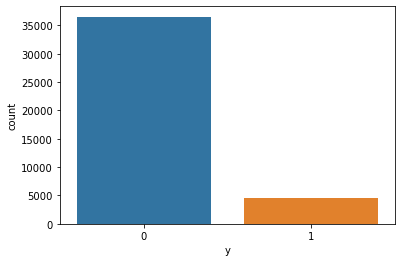

In [67]:
import seaborn as sns
sns.countplot(data['y'])

In [68]:
data.value_counts('y')

y
0    36548
1     4640
dtype: int64

In [69]:
from sklearn.utils import resample
#create two different dataframe of majority and minority class 
df_majority = data[(data['y']==0)] 
df_minority = data[(data['y']==1)] 
# upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,    # sample with replacement
                                 n_samples= 131177, # to match majority class
                                 random_state=42)  # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_minority_upsampled, df_majority])

In [70]:
df_upsampled['y'].value_counts()

1    131177
0     36548
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

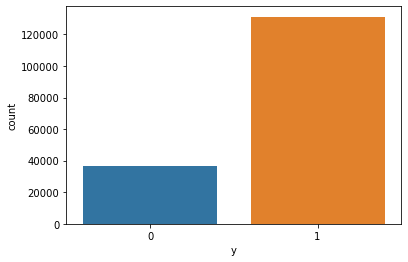

In [71]:
sns.countplot(df_upsampled['y'])

SMOTE for handling imbalanced dataset

In [72]:
from imblearn.over_sampling import SMOTE
# Resampling the minority class. The strategy can be changed as required.
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_sample(data.drop('y', axis=1), data['y'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

2022-04-18 11:07:45.974445: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [73]:
oversampled.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,0,56,1,11,1,0,0,0,99,5,1,261,1,0,1,93.994,-36.4,4.857
1,0,57,2,11,2,2,0,0,99,5,1,149,1,0,1,93.994,-36.4,4.857
2,0,37,2,11,2,0,1,0,99,5,1,226,1,0,1,93.994,-36.4,4.857
3,0,40,3,11,3,0,0,0,99,5,1,151,1,0,1,93.994,-36.4,4.857
4,0,56,2,11,2,0,0,1,99,5,1,307,1,0,1,93.994,-36.4,4.857


In [74]:
oversampled['y'].value_counts()

0    36548
1    36548
Name: y, dtype: int64

<AxesSubplot:xlabel='y', ylabel='count'>

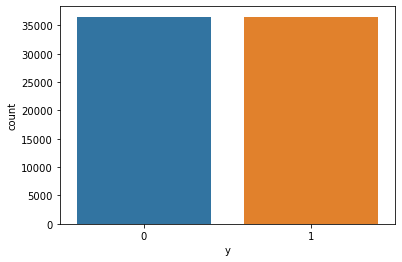

In [75]:
sns.countplot(oversampled['y'])

In [76]:
oversampled.shape

(73096, 18)

In [77]:
oversampled.columns

Index(['y', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'previous',
       'poutcome', 'cons.price.idx', 'cons.conf.idx', 'euribor3m'],
      dtype='object')

In [78]:
#pd.cut(oversampled, bins=3, labels=np.arange(3), right=False)

In [79]:
sampled_x=oversampled.iloc[:,:-1].values  
sampled_y=oversampled.iloc[:,-1].values 

In [80]:
sampled_x

array([[  0.        ,  56.        ,   1.        , ...,   1.        ,
         93.994     , -36.4       ],
       [  0.        ,  57.        ,   2.        , ...,   1.        ,
         93.994     , -36.4       ],
       [  0.        ,  37.        ,   2.        , ...,   1.        ,
         93.994     , -36.4       ],
       ...,
       [  1.        ,  26.        ,   3.        , ...,   1.        ,
         93.918     , -42.7       ],
       [  1.        ,  75.        ,   6.        , ...,   0.        ,
         93.81159755, -35.00340646],
       [  1.        ,  48.        ,   7.        , ...,   1.        ,
         93.7016652 , -43.82914961]])

In [81]:
x_train_sampled, x_test_sampled, y_train_sampled, y_test_sampled= train_test_split (sampled_x, sampled_y, test_size=0.25, random_state=0)

In [82]:
print(x_train_sampled.shape)
print(x_test_sampled.shape)
print(y_train_sampled.shape)
print(y_test_sampled.shape)

(54822, 17)
(18274, 17)
(54822,)
(18274,)


In [83]:
oversampled.head()

,y,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m
0,0,56,1,11,1,0,0,0,99,5,1,261,1,0,1,93.994,-36.4,4.857
1,0,57,2,11,2,2,0,0,99,5,1,149,1,0,1,93.994,-36.4,4.857
2,0,37,2,11,2,0,1,0,99,5,1,226,1,0,1,93.994,-36.4,4.857
3,0,40,3,11,3,0,0,0,99,5,1,151,1,0,1,93.994,-36.4,4.857
4,0,56,2,11,2,0,0,1,99,5,1,307,1,0,1,93.994,-36.4,4.857


In [104]:
oversampled.dtypes

y                   int64
age                 int64
job                 int64
marital             int64
education           int64
default             int64
housing             int64
loan                int64
contact             int64
month               int64
day_of_week         int64
duration            int64
campaign            int64
previous            int64
poutcome            int64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
dtype: object

In [110]:
from sklearn.preprocessing import StandardScaler 
sm = StandardScaler()
x_train_sampled = sm.fit_transform(x_train_sampled)  
x_test_sampled = sm.transform(x_test_sampled)  

In [111]:
from sklearn import utils
print(utils.multiclass.type_of_target(x_train_sampled))

continuous-multioutput


In [112]:
print(utils.multiclass.type_of_target(y_train_sampled))

continuous


In [113]:
print(utils.multiclass.type_of_target(x_test_sampled))

continuous-multioutput


In [114]:
print(utils.multiclass.type_of_target(y_test_sampled))

continuous


In [115]:
a_train = utils.multiclass.type_of_target(x_train_sampled.astype('int'))
a_train

'multiclass-multioutput'

In [116]:
b_train = utils.multiclass.type_of_target(y_train_sampled.astype('int'))
b_train

'multiclass'

In [117]:
a_test = utils.multiclass.type_of_target(x_test_sampled.astype('int'))
a_test

'multiclass-multioutput'

In [118]:
b_test = utils.multiclass.type_of_target(y_test_sampled.astype('int'))
b_test

'multiclass'

In [120]:
model4 = RandomForestClassifier()
model4.fit(a_train, b_train)                         #fit for train
y_pred = model4.predict(a_test)                      #Generate predictions with the model using our X values
print("Confusion Matrix: ", confusion_matrix(b_test, y_pred))  #confusion matrix
print ("Accuracy : ", accuracy_score(b_test,y_pred)*100)       #accuracy
print("Report : ", classification_report(b_test, y_pred))

ValueError: could not convert string to float: 'multiclass-multioutput'

model4 = RandomForestClassifier()
model4.fit(x_train_sampled, y_train_sampled)                         #fit for train
y_pred = model4.predict(a_test)                      #Generate predictions with the model using our X values
print("Confusion Matrix: ", confusion_matrix(y_test_sampled, y_pred))  #confusion matrix
print ("Accuracy : ", accuracy_score(y_test_sampled,y_pred)*100)       #accuracy
print("Report : ", classification_report(y_test_sampled, y_pred))